# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import dtreeviz
import matplotlib.font_manager
import scipy as sp
import warnings
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\notebooks
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


In [2]:
# Configuraciones
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8-talk")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

In [3]:
def metricas_evaluacion(y_test, y_pred, printed=True):
    if printed:
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
        print('r2_score:', metrics.r2_score(y_test,y_pred))
        print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))
        return None
    else:
        return metrics.mean_absolute_error(y_test,y_pred)

In [4]:
def plot_train_test_predict(y_train, y_test, y_pred):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    y_train.plot(**plot_params, ax=ax, color='blue', alpha=0.5, label='Train')
    y_test.plot(**plot_params, ax=ax, color='grey', alpha=0.5, label='Test')
    y_pred = pd.Series(y_pred, index=y_test.index)
    y_pred.plot(**plot_params, ax=ax, color='r', label='Predict')
    mae = metricas_evaluacion(y_test, y_pred, printed=False)
    fig.suptitle(f"Predicción de uso de bicicletas, MAE {mae:.2f}")
    plt.legend(loc=0)
    plt.xticks(rotation=70)
    plt.show()

In [5]:
df = pd.read_csv('./data/processed/usobarriosmeteo.csv')
df.tail()

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name,hora,dia,mes,anio,dia_nombre,dia_semana,findesemana
668,0.00,8.60,2.00,81.00,14.10,10.90,13.70,14.10,2025-03-03 06:00:00+00:00,2.00,CAMPANAR,6,3,3,2025,Monday,0,0
669,0.00,9.20,2.10,81.00,14.30,11.10,14.10,14.40,2025-03-03 07:00:00+00:00,5.00,CAMPANAR,7,3,3,2025,Monday,0,0
670,0.60,9.30,2.20,81.00,14.10,10.90,14.10,14.40,2025-03-03 08:00:00+00:00,10.00,CAMPANAR,8,3,3,2025,Monday,0,0
671,1.50,8.00,2.30,81.00,14.30,11.10,14.00,14.40,2025-03-03 09:00:00+00:00,8.00,CAMPANAR,9,3,3,2025,Monday,0,0
672,1.20,9.70,2.90,81.00,14.40,11.20,14.20,14.40,2025-03-03 10:00:00+00:00,3.00,CAMPANAR,10,3,3,2025,Monday,0,0


In [6]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.sort_values('fecha', inplace=True)
df.tail()


,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name,hora,dia,mes,anio,dia_nombre,dia_semana,findesemana
668,0.00,8.60,2.00,81.00,14.10,10.90,13.70,14.10,2025-03-03 06:00:00+00:00,2.00,CAMPANAR,6,3,3,2025,Monday,0,0
669,0.00,9.20,2.10,81.00,14.30,11.10,14.10,14.40,2025-03-03 07:00:00+00:00,5.00,CAMPANAR,7,3,3,2025,Monday,0,0
670,0.60,9.30,2.20,81.00,14.10,10.90,14.10,14.40,2025-03-03 08:00:00+00:00,10.00,CAMPANAR,8,3,3,2025,Monday,0,0
671,1.50,8.00,2.30,81.00,14.30,11.10,14.00,14.40,2025-03-03 09:00:00+00:00,8.00,CAMPANAR,9,3,3,2025,Monday,0,0
672,1.20,9.70,2.90,81.00,14.40,11.20,14.20,14.40,2025-03-03 10:00:00+00:00,3.00,CAMPANAR,10,3,3,2025,Monday,0,0


In [7]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [8]:
df = df.loc[df['name']=='CAMPANAR'].copy()
df.sort_values('fecha', inplace=True)
df.shape

(673, 18)

In [9]:
X = df.loc[:, ['hora', 'dia']] # Variables predictoras
y = df['uso_bici']  # Variable a predecir
X.shape, y.shape

((673, 2), (673,))

In [10]:
res_split = train_test_split(X, y, random_state=22, shuffle=False)
X_train, X_test, y_train, y_test = res_split # Separar en train y test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((504, 2), (169, 2), (504,), (169,))

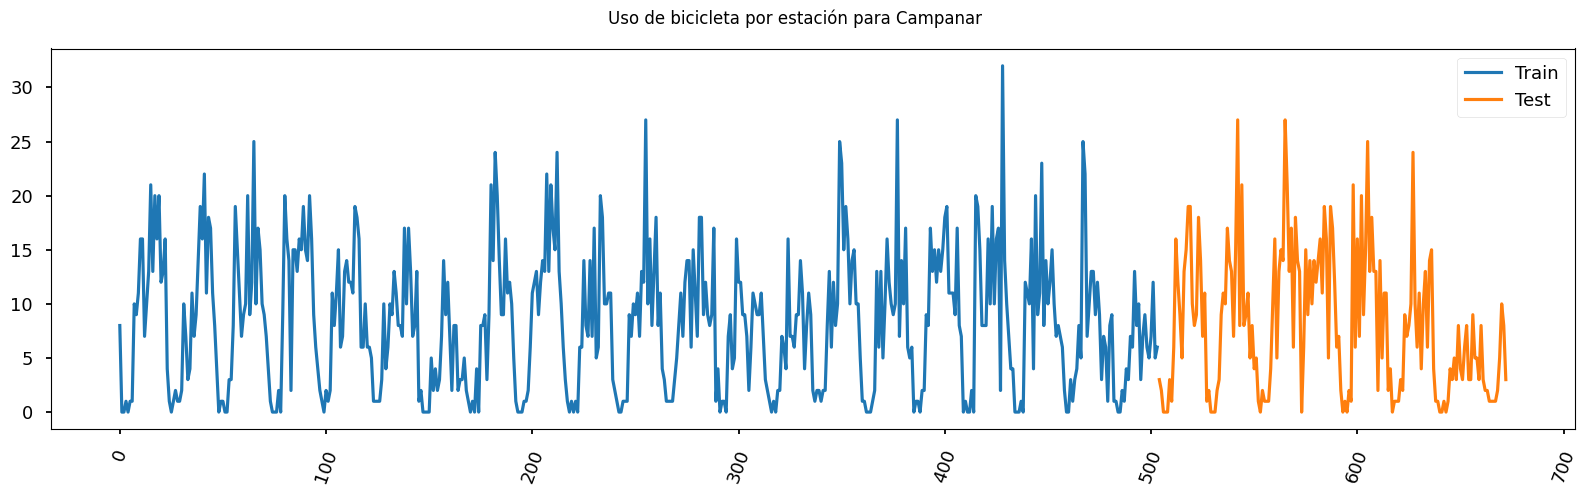

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
plt.legend(['Train', 'Test'])
fig.suptitle("Uso de bicicleta por estación para Campanar")
plt.xticks(rotation=70)
plt.show()

## Baseline

In [12]:
# Para cada valor del eje Y añade la media de los valores de la serie
y_pred = np.ones_like(y_test)
y_pred.fill(y_train.mean())
y_pred

array([8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992063,
       8.25992063, 8.25992063, 8.25992063, 8.25992063, 8.25992

In [13]:
metricas_evaluacion(y_test, y_pred)

Mean Absolute Error: 5.461409317178548
Mean Squared Error: 41.80957526693562
Root Mean Squared Error: 6.4660324208076485
r2_score: -0.001270559311146835
MAPE: 3081605070470641.0


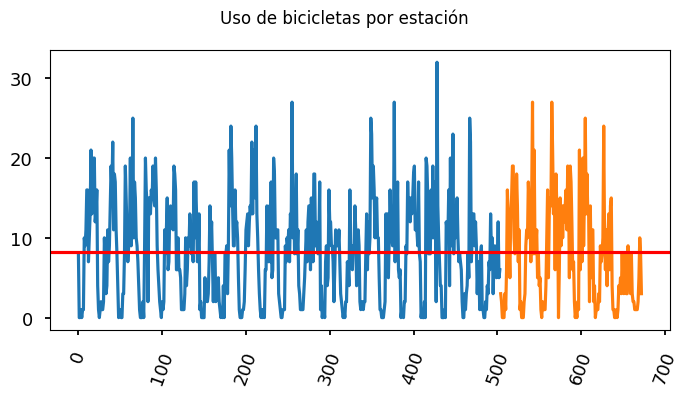

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(X_train.index, y_train)
ax.plot(X_test.index, y_test)
# Añadimos la media de la serie de entrenamiento
ax.axhline(y_train.mean(), color='r')
fig.suptitle("Uso de bicicletas por estación")
plt.xticks(rotation=70)
plt.show()

# Aprendizaje supervisado para el modelado del uso de bicis

Variable que queremos modelar el comportamiento se le denomina variable de salida, respuesta, endógena o y.

Variable o conjunto de variables que se relacionan con la respuesta son variables de entrada, predictoras, explicativas, regresores, exógenas, o x_i